<a href="https://colab.research.google.com/github/tianchu-shu/DistinctiveSchools/blob/master/Bullet_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pbpython.com/bullet-graph.html

In [120]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [121]:
import pandas as pd
import glob, os

data_dir= '/content/gdrive/My Drive/'
os.chdir(data_dir)
filename = 'BulletChartData.csv'

df=pd.read_csv(filename)
print("Column headings:")
print(df.columns)

Column headings:
Index(['StudentNumber', 'MatchID', 'StudentName', 'Campus', 'GradeLevel',
       'Homeroom', 'Discipline', 'CoreTeacher', 'Gender', 'DLStatus',
       'ELStatus', 'CurrentEL', 'Race', 'EcDis', 'W20GrowthGoal',
       'W20TargetRIT', 'S20CRGrowthGoal', 'S20CRTargetRIT',
       'S20TypicalGrowthGoal', 'S20TypicalTargetRIT', 'S19RIT', 'S19%ile',
       'F19RIT', 'F19%ile', 'BaselineRIT', 'Baseline Percentile', 'W20RIT',
       'W20%ile', 'W20CGP', 'BtoWChange', 'MetWinterGoal', 'NumberOfAbsences',
       'AbsenceCategory', 'NumberOfDiscipline', 'Disciplinez-Score',
       'DisciplineCategory'],
      dtype='object')


In [122]:
df

,StudentNumber,MatchID,StudentName,Campus,GradeLevel,Homeroom,Discipline,CoreTeacher,Gender,DLStatus,ELStatus,CurrentEL,Race,EcDis,W20GrowthGoal,W20TargetRIT,S20CRGrowthGoal,S20CRTargetRIT,S20TypicalGrowthGoal,S20TypicalTargetRIT,S19RIT,S19%ile,F19RIT,F19%ile,BaselineRIT,Baseline Percentile,W20RIT,W20%ile,W20CGP,BtoWChange,MetWinterGoal,NumberOfAbsences,AbsenceCategory,NumberOfDiscipline,Disciplinez-Score,DisciplineCategory
0,50443373,50443373.0,"Aguirre, Angel",Prairie,1st,Stoffey A,Mathematics,Stoffey A,M,Yes,Not EL,No,Other,Yes,13.0,164.0,25.0,176.0,22.0,173.0,151.0,22.0,153.0,27.0,151.0,22.0,167.0,37.0,91.0,16.0,1.0,2.0,Strong Attendance,9,2.377906,Significantly More Incidents than Peers
1,50535602,50535602.0,"Allen, Tyrianna",Prairie,1st,Stoffey A,Mathematics,Stoffey A,F,No,Not EL,No,Black - African American,Yes,10.0,175.0,20.0,185.0,21.0,186.0,NaN,NaN,165.0,63.0,165.0,63.0,170.0,46.0,NaN,5.0,0.0,7.0,Attednance Risk,0,-0.438035,Fewer Incidents than Peers
2,50641088,50641088.0,"Contreras, Itzhell",Prairie,1st,Stoffey A,Mathematics,Stoffey A,F,No,PY1,Yes,Other,Yes,10.0,181.0,20.0,191.0,16.0,187.0,171.0,75.0,167.0,68.0,171.0,75.0,173.0,56.0,67.0,2.0,0.0,15.0,Severe Chronic Absence,0,-0.438035,Fewer Incidents than Peers
3,50556635,50556635.0,"Corona, Ilani",Prairie,1st,Stoffey A,Mathematics,Stoffey A,F,No,Not EL,Yes,Hispanic or Latino,Yes,7.0,201.0,14.0,208.0,9.0,203.0,194.0,99.0,181.0,94.0,194.0,99.0,190.0,93.0,70.0,-4.0,0.0,0.0,Perfect Attendance,0,-0.438035,Fewer Incidents than Peers
4,50641079,50641079.0,"de La O, Kamyla",Prairie,1st,Stoffey A,Mathematics,Stoffey A,F,No,Not EL,Yes,Other,Yes,9.0,190.0,17.0,198.0,13.0,194.0,181.0,92.0,165.0,63.0,181.0,92.0,189.0,92.0,99.0,8.0,0.0,10.0,Chronic Absence,0,-0.438035,Fewer Incidents than Peers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,60040610,60040610.0,"Wilson, Asia",Art in Motion,7th,Hicks M,Reading,Drumgoole L,F,No,Not EL,No,BLK,Yes,2.0,227.0,4.0,229.0,3.0,228.0,NaN,NaN,225.0,76.0,225.0,76.0,215.0,46.0,2.0,-10.0,0.0,4.0,Strong Attendance,3,-0.336406,Fewer Incidents than Peers
5918,50263275,50263275.0,"Woods, Collin",Art in Motion,8th,Hudson A,Reading,Brinkman K,M,No,Not EL,No,BLK,Yes,1.0,234.0,2.0,235.0,2.0,235.0,233.0,NaN,231.0,27.0,233.0,27.0,237.0,88.0,84.0,4.0,1.0,8.0,Attednance Risk,3,-0.336406,Fewer Incidents than Peers
5919,50283392,50283392.0,"Woods, Zaria",Art in Motion,7th,Keys V,Reading,Drumgoole L,F,No,Not EL,No,BLK,Yes,3.0,219.0,5.0,221.0,4.0,220.0,216.0,NaN,204.0,26.0,216.0,26.0,197.0,10.0,3.0,-19.0,0.0,0.0,Perfect Attendance,0,-0.696840,Fewer Incidents than Peers
5920,60043855,60043855.0,"Wright, Dariyon",Art in Motion,7th,Drumgoole L,Reading,Drumgoole L,M,No,Not EL,No,BLK,Yes,3.0,220.0,5.0,222.0,4.0,221.0,NaN,NaN,217.0,58.0,217.0,58.0,230.0,82.0,98.0,13.0,1.0,2.0,Strong Attendance,0,-0.696840,Fewer Incidents than Peers


In [0]:
keep = ['W20RIT','S20CRTargetRIT','F19RIT','W20TargetRIT','S20TypicalTargetRIT']

In [124]:
df.groupby(['Campus',"Discipline"], as_index=False)[keep].mean().round(1)

,Campus,Discipline,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
0,3146,Mathematics,NaN,191.8,170.5,182.9,188.6
1,3146,Reading,NaN,185.5,167.3,177.7,182.8
2,3147,Mathematics,NaN,183.8,162.7,174.0,180.9
3,3147,Reading,NaN,179.5,160.9,170.9,177.1
4,Art in Motion,Mathematics,218.6,230.0,216.5,225.6,225.9
5,Art in Motion,Reading,215.6,222.6,215.7,220.0,220.6
6,Bucktown,Mathematics,202.4,215.6,192.7,209.5,211.9
7,Bucktown,Reading,195.8,206.9,187.8,202.2,204.8
8,Irving Park,Mathematics,200.3,211.1,194.9,204.6,207.5
9,Irving Park,Reading,195.9,203.2,190.9,197.9,201.1


One per campus per grade and a campus summary so: campus, grade level  with 5 numerical values (background Fall RIT, Winter Target, Spring Typical Target; bar WInter RIT and Line Spring College Ready).

In [129]:
#Total math and reading mean for Distinctive Schools
total = df.groupby(["Discipline"], as_index=False)[keep].mean().round(1)
total

,Discipline,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
0,Mathematics,203.0,210.1,190.2,203.4,206.4
1,Reading,197.5,201.9,186.3,196.5,199.6


<BarContainer object of 1 artists>

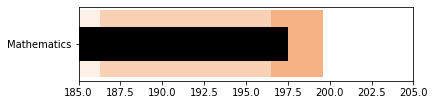

In [140]:
limits = [186.3, 196.5, 199.6]
data_to_plot = ("Mathematics", 197.5, 201.9)
palette = sns.light_palette('#ef7521', 5)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_xlim(185, 205)
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=4, color=palette[idx])
    prev_limit = lim

# Draw the value we're measuring
ax.barh([1], data_to_plot[1], color='black', height=2)

<BarContainer object of 1 artists>

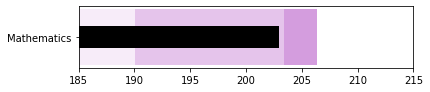

In [137]:
limits = [190.1, 203.4, 206.4]
data_to_plot = ("Mathematics", 203, 210.1)
palette = sns.light_palette('#b24ec4', 5)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_xlim(185, 215)
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=5, color=palette[idx])
    prev_limit = lim

# Draw the value we're measuring
ax.barh([1], data_to_plot[1], color='black', height=2)

In [0]:
#adding as_index=False to make the groupby output into a dataframe
schools = df.groupby(['Campus',"Discipline"], as_index=False)[keep].mean().round(1)

In [0]:
schools= schools.loc[4:,:]

In [127]:
schools

,Campus,Discipline,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
4,Art in Motion,Mathematics,218.6,230.0,216.5,225.6,225.9
5,Art in Motion,Reading,215.6,222.6,215.7,220.0,220.6
6,Bucktown,Mathematics,202.4,215.6,192.7,209.5,211.9
7,Bucktown,Reading,195.8,206.9,187.8,202.2,204.8
8,Irving Park,Mathematics,200.3,211.1,194.9,204.6,207.5
9,Irving Park,Reading,195.9,203.2,190.9,197.9,201.1
10,Prairie,Mathematics,201.7,211.8,194.3,205.4,207.6
11,Prairie,Reading,195.2,201.6,188.5,196.1,198.9
12,West Belden,Mathematics,201.9,215.8,193.8,209.9,212.2
13,West Belden,Reading,196.3,206.5,189.6,201.8,204.4


In [0]:
#Create a floor to round down the W20RIT to the nearest 5
schools['Floor'] = schools['W20RIT'].apply(lambda x : int((round(x/5)-1)*5))

In [0]:
#Create a ceiling to round up the S20CRTargetRIT to the nearest 5
schools['Ceiling'] = schools['S20CRTargetRIT'].apply(lambda x : int(round(x/5)*5))

In [0]:
math = schools[schools['Discipline']=='Mathematics']

In [0]:
reading = schools[schools['Discipline']=='Reading']

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

%matplotlib inline

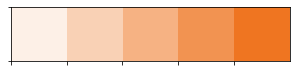

In [132]:
#reading
sns.palplot(sns.light_palette('#ef7521', 5))


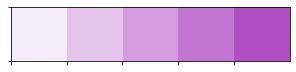

In [61]:
#MATH'
sns.palplot(sns.light_palette('#b24ec4', 5))

In [89]:
reading.iloc[:5,:4]

,Campus,Discipline,W20RIT,S20CRTargetRIT
5,Art in Motion,Reading,215.6,222.6
7,Bucktown,Reading,195.8,206.9
9,Irving Park,Reading,195.9,203.2
11,Prairie,Reading,195.2,201.6
13,West Belden,Reading,196.3,206.5


In [90]:
#Create the text, bar and line
tlr= reading.iloc[:5,:4].values.tolist()
tlr


[['Art in Motion', 'Reading', 215.6, 222.6],
 ['Bucktown', 'Reading', 195.8, 206.9],
 ['Irving Park', 'Reading', 195.9, 203.2],
 ['Prairie', 'Reading', 195.2, 201.6],
 ['West Belden', 'Reading', 196.3, 206.5]]

In [91]:
#Create the limits
llr = reading.iloc[:, np.r_[4:7]].values.tolist()
llr

[[215.7, 220.0, 220.6],
 [187.8, 202.2, 204.8],
 [190.9, 197.9, 201.1],
 [188.5, 196.1, 198.9],
 [189.6, 201.8, 204.4]]

In [92]:
#Create the text, bar and line
tl= math.iloc[:5,:4].values.tolist()
tl

[['Art in Motion', 'Mathematics', 218.6, 230.0],
 ['Bucktown', 'Mathematics', 202.4, 215.6],
 ['Irving Park', 'Mathematics', 200.3, 211.1],
 ['Prairie', 'Mathematics', 201.7, 211.8],
 ['West Belden', 'Mathematics', 201.9, 215.8]]

In [93]:
import numpy as np
#Create the limits
ll = math.iloc[:, np.r_[4:7]].values.tolist()
ll

[[216.5, 225.6, 225.9],
 [192.7, 209.5, 211.9],
 [194.9, 204.6, 207.5],
 [194.3, 205.4, 207.6],
 [193.8, 209.9, 212.2]]

In [0]:
csfont = {'fontname':'Calibri'}
def bulletgraph(data=None, limits=None, labels=None, ranges=None, axis_label=None, title=None,
                size=(5, 3), subject= 'Reading', formatter=None, target_color="black", bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            lim = list of xlims 
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            subject = maths or reading
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[0][-1] / 40

    # Use the green palette as a sensible default
    
    if subject =='Reading':
      palette = sns.light_palette('#ef7521', 3, reverse=True)
    else:
      palette = sns.light_palette('#b24ec4', 3, reverse=True)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        #Text for that bar
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.set_xlim(ranges)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits[idx]):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
            rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[2], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(item[3], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=20, **csfont)
    fig.subplots_adjust(hspace=0)

In [0]:
import matplotlib.font_manager

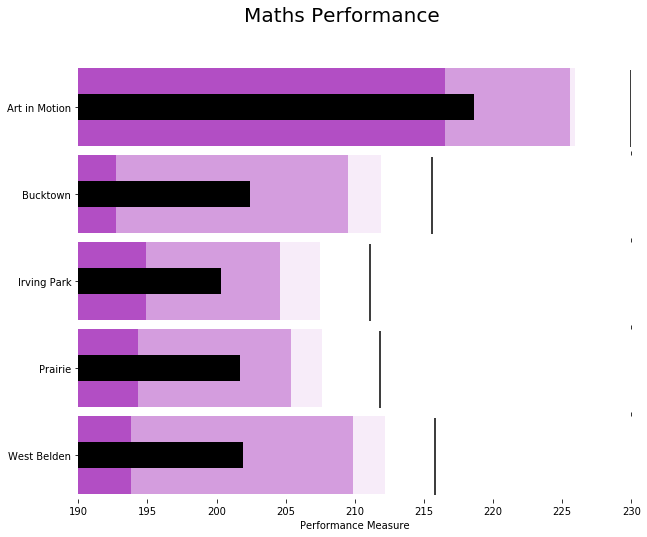

In [118]:
bulletgraph(tl, ll, ranges =(190,230), size=(14,8), subject='Math',
            axis_label="Performance Measure",title="Maths Performance")

In [86]:
tlr

[['Art in Motion', 'Reading', 215.6, 222.6],
 ['Bucktown', 'Reading', 195.8, 206.9],
 ['Irving Park', 'Reading', 195.9, 203.2],
 ['Prairie', 'Reading', 195.2, 201.6],
 ['West Belden', 'Reading', 196.3, 206.5]]

In [98]:
llr

[[215.7, 220.0, 220.6],
 [187.8, 202.2, 204.8],
 [190.9, 197.9, 201.1],
 [188.5, 196.1, 198.9],
 [189.6, 201.8, 204.4]]

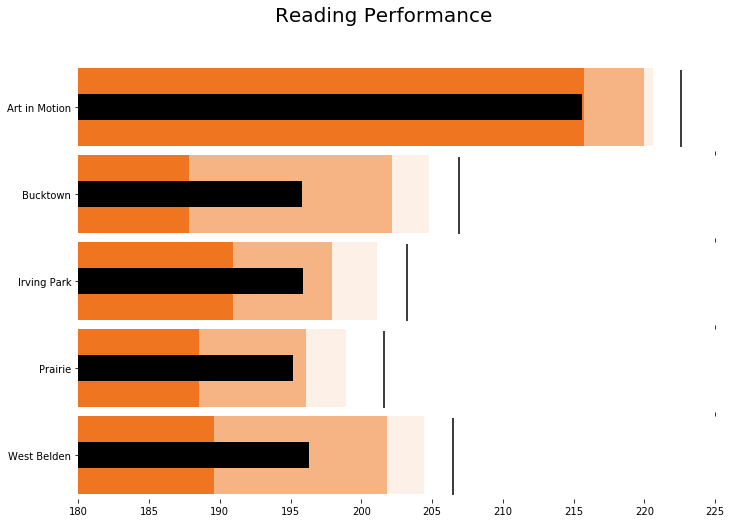

In [119]:
bulletgraph(tlr, llr, ranges =(180,225), size=(14,8), subject='Reading', label_color="black", target_color='black',title="Reading Performance")